# Writing Config Files

### Manually specifying geometry
Geometry can be manually specified using bitstrings. For example, the below config describes a walk in 2D with a hard boundary at y=2. y=2 can be inferred from 2 = `010` in binary, and y is dimension 1 (x = dimension 0, y = dimension 1 etc.). This walk also has an additional soft bounbdary controlled by a hadamard coin along the line y=5. The coin controlling this boundary has 1 qubit, as specified by the `NQubits` flag inside the boundary configuration. Finally, the walk begins in position (0,1), as specified by the `InitialState` flag.

In [ ]:
Name: "2D_Manual_config_debug"
ExperimentParams:
  Type: Single
  NSteps: 10
  NDims: 2
  NQubits: 3
  Coin: "Hadamard"
  Boundaries:

    - Type: "Hard"
      Bitstring: "010"
      Dim: 1

    - Type: Soft
      Bitstring: "101"
      ControlClass: "Hadamard"
      NQubits: 1
      Dim: 1

  InitialState: "000 001"
  Shots: 1024

OutputPath: "/Users/Ali/Downloads"

running on device: CPU
Backend: aer_simulator


mkdir: /Users/Ali/Downloads/Experiment_2_dims_3_qubits_Hadamard_coin: File exists
mkdir: /Users/Ali/Downloads/Experiment_2_dims_3_qubits_Hadamard_coin/images: File exists
mkdir: /Users/Ali/Downloads/Experiment_2_dims_3_qubits_Hadamard_coin/data: File exists
mkdir: /Users/Ali/Downloads/Experiment_2_dims_3_qubits_Hadamard_coin/debug: File exists
/Volumes/Extreme SSD/AEROY4/Simulation-of-a-Quantum-Computer/qiskit-env/lib/python3.7/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


0:00:17.812400
Elapsed experiment time: 0:00:01.258701 
diffusion tensor

          d0        d1
d0  1.000000 -0.047619
d1 -0.047619  1.000000
Experiment Completed!


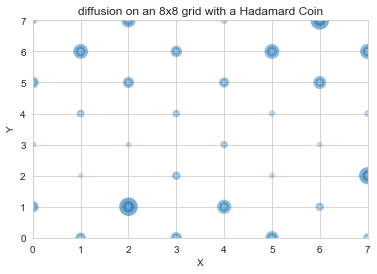

In [1]:
from DiffusionProject.JobManager.config import Config


config_path = "/Volumes/Extreme SSD/AEROY4/Simulation-of-a-Quantum-Computer/qiskit-env/lib/python3.7/site-packages/DiffusionProject/JobManager/Configs/BitstringBoundaryDebug.yml"

config = Config(config_path)
experiment = config.gen_experiment_from_config()
experiment.run_locally(show_fig = True)

### Using keywords to generate geometry
Geometry can also be specified using keywords. Ommiting the `Dims` keyword will apply the boundary in all dimensions. Setting the `Geometry` flag to `"Edges"`, `"LeftEdge"` or `"RightEdge"` can be used to add boundaries on the edges of the domain. In addition the `Padding` keyword can be used to pad the boundaries a set number of digits away from edges. Finally, setting the `InitialState` to `auto` will initialise the walk at the centre of the domain. For example:

In [ ]:
Name: "2D_keyword_config_debug"
ExperimentParams:
  Type: Single
  NSteps: 10
  NDims: 2
  NQubits: 3
  Coin: Hadamard
  Boundaries:

    - Type: Hard
      Geometry: Edges
      Padding: 2
    

  InitialState: auto
  Shots: 1024

OutputPath: "/Users/Ali/Downloads"

running on device: CPU
Backend: aer_simulator


mkdir: /Users/Ali/Downloads/Experiment_2_dims_3_qubits_Hadamard_coin: File exists
mkdir: /Users/Ali/Downloads/Experiment_2_dims_3_qubits_Hadamard_coin/images: File exists
mkdir: /Users/Ali/Downloads/Experiment_2_dims_3_qubits_Hadamard_coin/data: File exists
mkdir: /Users/Ali/Downloads/Experiment_2_dims_3_qubits_Hadamard_coin/debug: File exists
/Volumes/Extreme SSD/AEROY4/Simulation-of-a-Quantum-Computer/qiskit-env/lib/python3.7/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


0:00:12.242400
Elapsed experiment time: 0:00:00.033078 
diffusion tensor

          d0        d1
d0  1.000000 -0.454545
d1 -0.454545  1.000000
Experiment Completed!


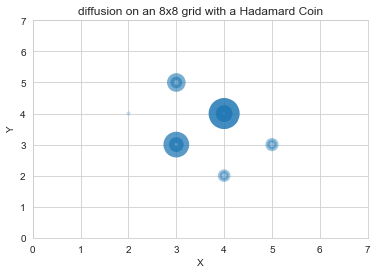

In [3]:
from DiffusionProject.JobManager.config import Config


config_path = "/Volumes/Extreme SSD/AEROY4/Simulation-of-a-Quantum-Computer/qiskit-env/lib/python3.7/site-packages/DiffusionProject/JobManager/Configs/KeywordGeometryDebug.yml"

config = Config(config_path)
experiment = config.gen_experiment_from_config()
experiment.run_locally(show_fig = True)

### Running jobs on PBS
PBS options for running using PBS can also be added under `JobParams`

In [ ]:
Name: "7qubits2D_Grover_4096shots_62gb"
ExperimentParams:
  Type: Batch
  BatchParams:
    StepSize: 10
    StartIterations: 140
    MaxIterations: 300
  NDims: 2
  NQubits: 7
  Coin: "Grover"
  Boundaries:
    - Type: "Hard"
      Geometry: Edges
  InitialState: "auto"
  Shots: 4096

JobParams:
  NCPUs: 32
  Memory: 62
  Walltime: 72
  BatchSize: 1

KeepJobFiles: false

In [ ]:
from DiffusionProject.JobManager.config import Config


config_path = "/Volumes/Extreme SSD/AEROY4/Simulation-of-a-Quantum-Computer/qiskit-env/lib/python3.7/site-packages/DiffusionProject/JobManager/Configs/PBSDebug.yml"

config = Config(config_path)
config.run_on_PBS()
